In [1]:
#Relevant imports

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Neural Network with feed dictionaries

In [2]:
#Example of using feed dictionaries
#Creating two uniform random variables of shape (5,5)

a = np.random.uniform(0,100,(5,5))
b = np.random.uniform(0,100,(5,5))

var1 = tf.placeholder(tf.float32,shape=(5,5))
var2 = tf.placeholder(tf.float32,shape=(5,5))
add = var1 + var2

with tf.Session() as sess:
    result = sess.run(add, feed_dict={var1:a, var2:b})

print(result)

[[123.63758  136.26466   59.122993 101.119415 115.68213 ]
 [136.81638   73.45244  165.2276    53.500465 187.2669  ]
 [170.91202  116.54109   20.635292  57.24941   86.40939 ]
 [101.482994 104.6215    23.32844   55.819153 103.72682 ]
 [164.84483   96.64345  107.75501  108.2251   160.0691  ]]


In [3]:
#Another Example

np.random.seed(99)
tf.set_random_seed(99)

var1 = np.random.uniform(0,100,(5,5))
var2 = np.random.uniform(0,100,(5,5))

a = tf.placeholder(tf.float32, shape=(5,5))
b = tf.placeholder(tf.float32, shape=(5,5))

add = a + b
mul = a * b

with tf.Session() as sess:
    res_add = sess.run(add, feed_dict={a:var1, b:var2})
    res_mul = sess.run(mul, feed_dict={a:var1, b:var2})
    
print("Addition\n")
print(res_add)
print("\nMultiplication")
print(res_mul)


Addition

[[ 89.3856   113.291306  92.06767   44.310963  90.491516]
 [ 70.962845  50.981865  52.335186 106.82412   24.18695 ]
 [ 77.634605 164.54114   92.96733   66.16941  185.78265 ]
 [ 93.75418  101.57148  104.92915   73.375565 161.39667 ]
 [104.66056   80.6978   126.05427  128.23805  109.21338 ]]

Multiplication
[[1489.6173   3147.2986    785.71967   129.45322   782.71967 ]
 [ 814.5513    631.5436    222.57802   768.8639     16.04346 ]
 [  50.444557 6710.7793   2084.3477    827.9274   8628.799   ]
 [2143.7078    406.70987  2752.5312    599.2572   6511.8203  ]
 [1767.4128   1400.4562   2829.9646   3805.167    2186.7874  ]]


# Example Neural Network

In [4]:
n_features = 10
n_neurons = 3

In [5]:
#Placeholder for X
#X will hold data, its dimensions are rows*n_features

x = tf.placeholder(tf.float32, shape=[None, n_features])

In [8]:
#Variables for b and w
#Bias corresponding to each neuron

b = tf.Variable(tf.zeros([n_neurons]))
#Weights corresponding to every feature in each neuron
w = tf.Variable(tf.random_normal([n_features, n_neurons]))

In [9]:
#Operations

mul = tf.matmul(x,w)
z = tf.add(mul, b)
act = tf.sigmoid(z)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    result = sess.run(act, feed_dict={x: np.random.random([2, n_features])})
    
print(result)

[[0.09620656 0.23766455 0.97016495]
 [0.10591022 0.480637   0.80651283]]


# Full Network Example

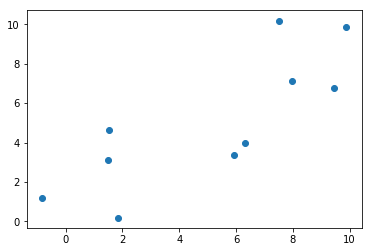

In [10]:
#Data creation
#X and Y corresponding to 10 points each

x = np.linspace(0,10,10) + np.random.uniform(-2,2,10)
y = np.linspace(0,10,10) + np.random.uniform(-2,2,10)

plt.scatter(x,y)

In [15]:
#Variables for bias and weight

b = tf.Variable(0.1)
w = tf.Variable(5.0)

In [16]:
#Cost function

error = 0

for x_temp, y_temp in zip(x,y):
    y_pred = w * x_temp + b
    error += (y_temp - y_pred)**2

In [20]:
#Optimizer

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
model = optimizer.minimize(error)

In [21]:
#variable intializer

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    n_epochs = 1000
    
    for epoch in range(n_epochs):
        sess.run(model)
        
    #Fetch weight and bias
    final_w, final_b = sess.run([w,b])
    
    

In [22]:
final_w

0.7205642

In [23]:
final_b

1.3565004

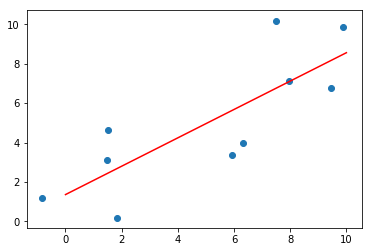

In [28]:
#Evaluate results

x_test = np.linspace(0,10,10)
y_pred_test = x_test * final_w + final_b

plt.scatter(x,y)
plt.plot(x_test, y_pred_test,'r')